# Welcome Back:
Before we start on the new topic in regrression and data fitting which are fundamentals to data analytics, we need to recap on linear algerba operation, if you have a fresh memory on that please jump to the section on linear regression: 

In this module, you will learn about: 
- Linear algebra operations
- Vandermonde matrix
- Linear Regression 
    - gaussian_features
    - sckit-learn
- Parametric & Non Parametric Models
- Accuracy validation
    - Anscomb's quartet
    - Parity plot

# Matrix-Vector Multipication: 

Many of the topics that we will cover in this modeule is based on linear algebra. So it is useful to have a refresher on some of the key concepts. 

First, some definitions:

* Dot product or "inner product":

$\vec{a} \cdot{} \vec{b} = \sum_i a_i b_i$

* Matrix/vector multiplication:

$\bar{\bar{A}} \vec{x} = \sum_j A_{ij} x_j = b_i$

* Matrix/matrix multiplication:

$\bar{\bar{A}} \bar{\bar{B}} = \sum_j A_{ij} B_{jk}$

Probably all the students studying linear algebra will learn about "Vandermonde" matrix sooner or later [Read about Vandermonde Matrix](https://towardsdatascience.com/the-vandermonde-determinant-a-novel-proof-851d107bd728).  Here, we will explore matrix-vector multiplication conceptually by constructing a dataset from the "Vandermonde" matrix of polynomials and a weight vector, $\vec{w}$ to construct a dataset of the form:

$y_i = w_0 + w_1 x_i + w_2 x_i^2$

it may be useful to write this with summation notation and compare it to the matrix-vector multiplication definition:

$y_i = \sum_{j=0}^2 w_j x_i^{\: j}$

First, we can use `numpy` to create a vector $x_i$:

In [25]:
%matplotlib inline 

import numpy as np
import pylab as plt

plt.style.use('../settings/plot_style.mplstyle')

In [26]:
xi = np.linspace(0,80,21)# creating a vector
print(xi)

zi = xi**2 #Creating vector z_i = x_i^2
print(zi)
wj = [2.0, 0.5, -0.2] #Creating vector that contains each of the weight parameters, wj

[ 0.  4.  8. 12. 16. 20. 24. 28. 32. 36. 40. 44. 48. 52. 56. 60. 64. 68.
 72. 76. 80.]
[   0.   16.   64.  144.  256.  400.  576.  784. 1024. 1296. 1600. 1936.
 2304. 2704. 3136. 3600. 4096. 4624. 5184. 5776. 6400.]


We can now construct $y_i$ manually:

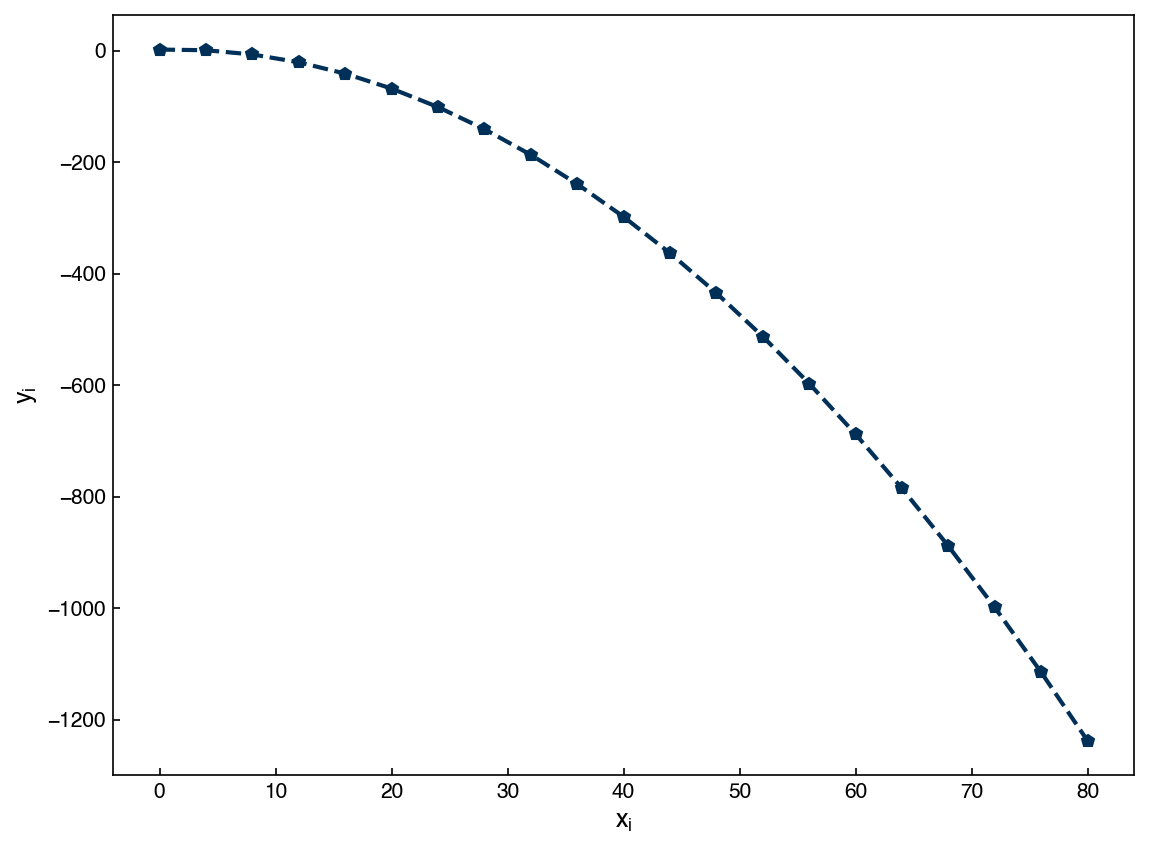

In [27]:
yi = wj[0] + wj[1]*xi + wj[2]*zi

fig, ax = plt.subplots()

ax.plot(xi, yi, '--p')
ax.set_xlabel('$x_i$')
ax.set_ylabel('$y_i$');

This works, but we can create the same dataset using a Vandermonde matrix, which is a matrix of polynomials defined as:

$X_{ij} = x_i^{\: j}$

In other words, each column of the matrix consists of a different polynomial.

We can construct this matrix using `numpy`. First, we need to turn $x_i$ into a column vector:

- xi_col = xi.reshape((xi.shape[0], 1)) #<- here we "reshape" the matrix into a column
- xi_col = xi.reshape(-1, 1) #<- this is equivalent, but less clear. It is a common shortcut.

Then we need to "stack" all the vectors together to make a Vandermonde matrix.

In [28]:
print("x_i vector shape: {}".format(xi.shape))
xi_col = xi.reshape(-1, 1) # using this line, you can change a vetor to a column
print("x_i column shape: {}".format(xi_col.shape))

xi = xi_col
X_vdm = np.hstack((xi**0, xi**1, xi**2)) #storing all columns in one matrix
X_vdm

x_i vector shape: (21,)
x_i column shape: (21, 1)


array([[1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 4.000e+00, 1.600e+01],
       [1.000e+00, 8.000e+00, 6.400e+01],
       [1.000e+00, 1.200e+01, 1.440e+02],
       [1.000e+00, 1.600e+01, 2.560e+02],
       [1.000e+00, 2.000e+01, 4.000e+02],
       [1.000e+00, 2.400e+01, 5.760e+02],
       [1.000e+00, 2.800e+01, 7.840e+02],
       [1.000e+00, 3.200e+01, 1.024e+03],
       [1.000e+00, 3.600e+01, 1.296e+03],
       [1.000e+00, 4.000e+01, 1.600e+03],
       [1.000e+00, 4.400e+01, 1.936e+03],
       [1.000e+00, 4.800e+01, 2.304e+03],
       [1.000e+00, 5.200e+01, 2.704e+03],
       [1.000e+00, 5.600e+01, 3.136e+03],
       [1.000e+00, 6.000e+01, 3.600e+03],
       [1.000e+00, 6.400e+01, 4.096e+03],
       [1.000e+00, 6.800e+01, 4.624e+03],
       [1.000e+00, 7.200e+01, 5.184e+03],
       [1.000e+00, 7.600e+01, 5.776e+03],
       [1.000e+00, 8.000e+01, 6.400e+03]])

Next we can directly create $y_i$ using matrix-vector multiplication based on the definition of matrix-vector multiplication:

$\bar{\bar{X}}\vec{w} = \sum_j X_{ij}w_j = \sum_j x_i^{\:j} w_j = w_0x_i^0 + w_1x_i^1 + w_2x_i^2+ ... w_nx_i^n = w_0 + w_1x_i +w_2x_i^2 + ... w_nx_i^n$


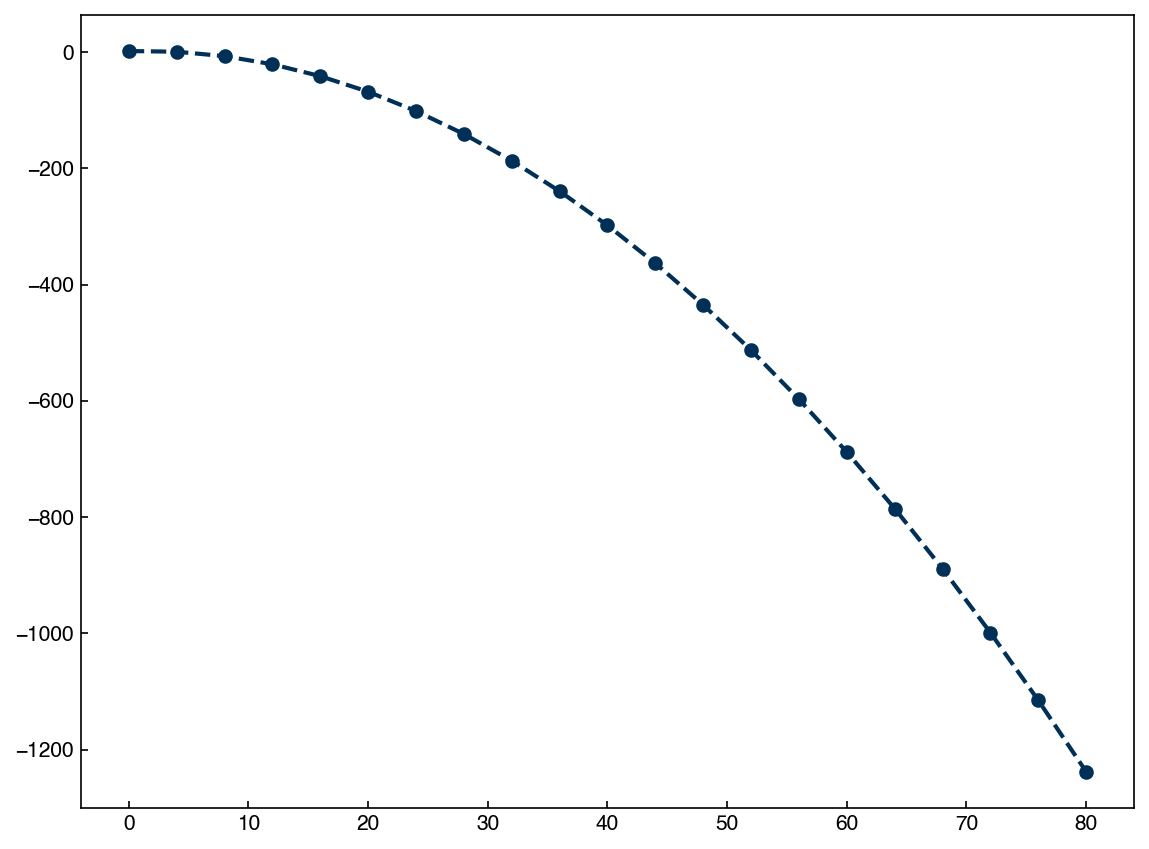

In [29]:
yi_vdm = X_vdm@wj #we learned about this on the first note of this module

fig, ax = plt.subplots()

ax.plot(xi, yi_vdm, '--o');

We can verify that they are equal, using == or using "isclose" since numerical methods are prone to very small errors:

In [30]:
#yi == yi_vdm 

#np.isclose(yi, yi_vdm)

M = np.isclose(yi, yi_vdm)# these method is a good way to summerize that and check if all values are equal!
M.all()

True

You can read more on the Linear Algebra including topics on norms, orthogonality using [Elements of linear algebra](https://github.com/jermwatt/machine_learning_refined/blob/gh-pages/notes/16_Linear_algebra/16_2_Vectors.ipynb)

# Linear Regression
## simple linear regression

When dealing with more than one variable, experimenter ususally interseted to study the relationship between those variables. In other words how one variable deponds upon one or more variables. When the variables have a random component, still there will be an underlying structure that experimenters can investigate. 
Linear regression is a modeling technique in which the expected value of the dependent variable is modeled as a linear combination of a set of explanatory variables. Simple linear regression refers a model with only one explanatorry variable. 

Linear regression is a great starting point for understanding how linear algebra and optimization are used together for data analytics. 

The form of a simple linear regression model is given as:

$y = mx + b + \epsilon$

where the $y$ is the independent value, $x$ is the dependent value, $m$ is the slope of the line, $b$ is the intercept, and $\epsilon$ is the "error"  between the model and the actual data. This can also be written with indices on the data:

$y_i = mx_i + b + \epsilon_i$

where $i$ refers to the index of the data point (e.g. the first, second, third, ... data point). We can also think of these quantities as vectors:

$\vec{y} = m\vec{x} + b + \vec{\epsilon}$

To make things consistent, we can re-write this as:

$y_i = w_0x_i^0 + w_1 x_i^1 + \epsilon_i$

where $w_0 = b$ and $w_1 = m$. Now we can re-write this as a matrix-vector product:

$y_i = \sum_{j=0}^1 w_j x_i^{\:j} + \epsilon_i$

If you recall the Vandermonde matrix, this can be written as:

$\vec{y} = \bar{\bar{X}}\vec{w} + \vec{\epsilon}$

where $\bar{\bar{X}}$ is the first-order Vandermonde matrix. We can create a dataset that satisfies this model using `numpy`:

[[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]
[  1.4  -1.1  -3.6  -6.1  -8.6 -11.1 -13.6 -16.1 -18.6 -21.1 -23.6]


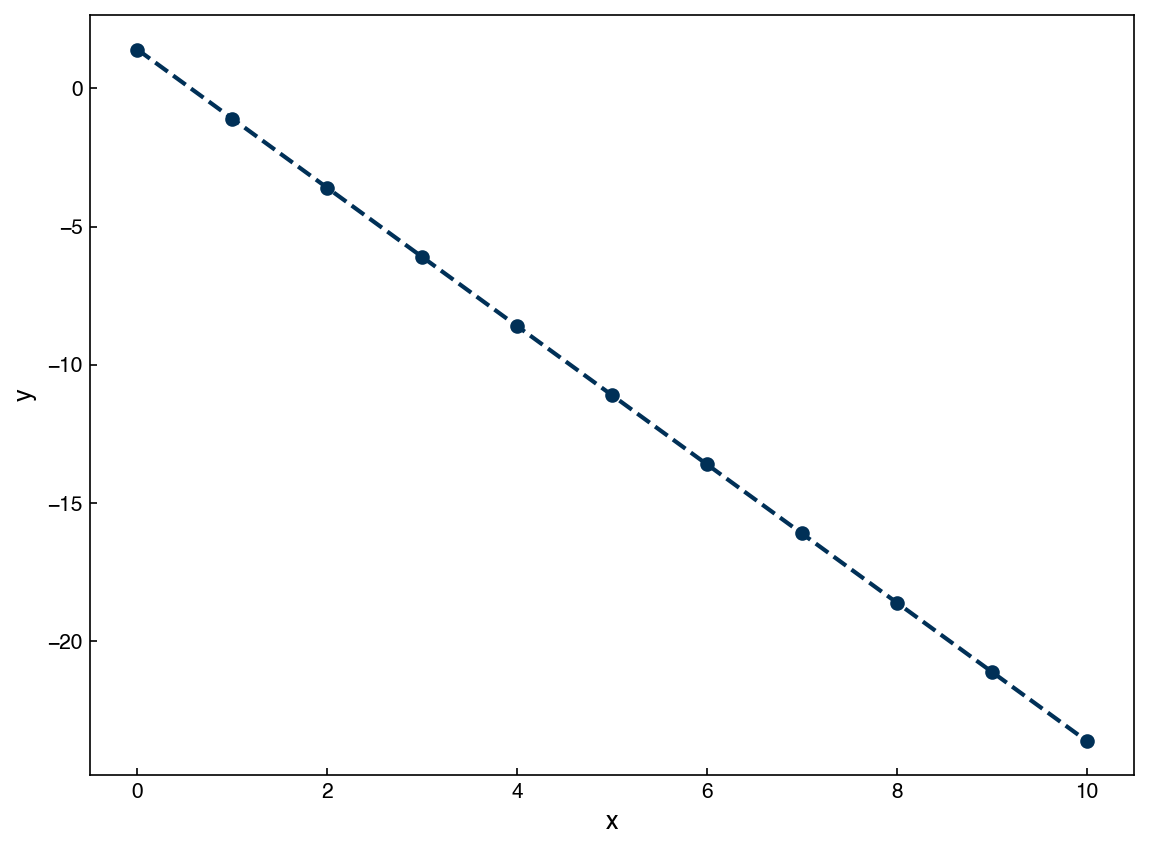

In [31]:
x = np.linspace(0,10,11) #These are all the steps that we showed on top!
x = x.reshape(-1, 1) #make x into a column vector
#print(x)
w = [1.4, -2.5]

X = np.hstack((x**0, x))
print(X)
y = X@w
print(y)

fig, ax = plt.subplots()
ax.plot(x, y, '--o');

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

We are still missing the $\epsilon$ term. This is the error, and in linear regression we assume that the error follows a normal distribution. Hopefully you remember normal distributions from your stats class. We can generate a vector of normally-distributed noise using `numpy` and add it to $\vec{y}$:

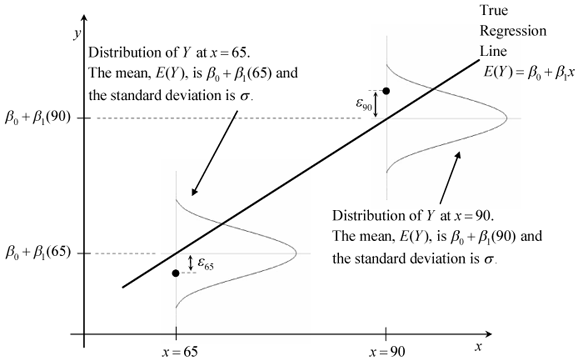

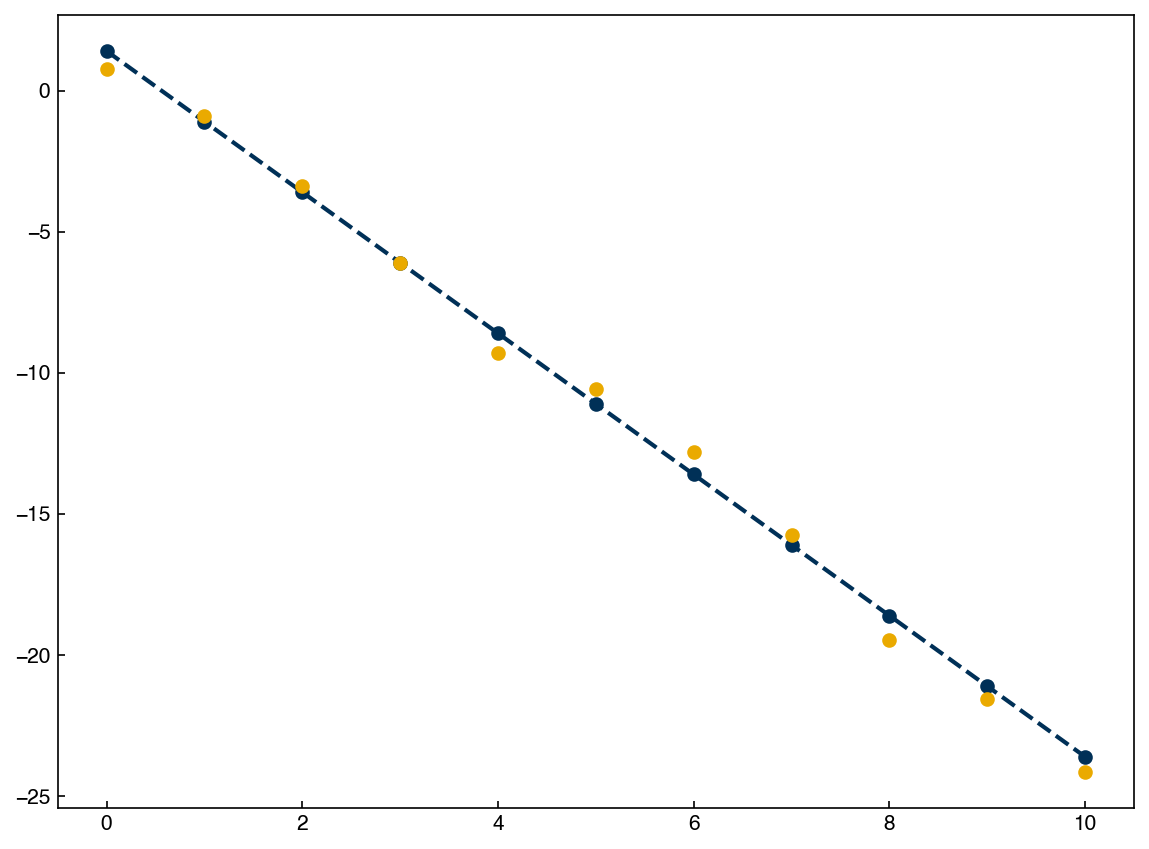

In [32]:
from numpy.random import normal
#help(normal)
epsilon = normal(0, 0.5, len(x))

fig, ax = plt.subplots()
ax.plot(x, y, '--o')
y = y + epsilon
ax.plot(x, y, 'o');

The goal of linear regression is to use the data, $y_i$ to recover the "best fit" line. In this case, we know the answer since we generated the data. However, we can also try to recover the line based only on the noisy data.

There are multiple ways to derive linear regression, but here we will derive it by minimizing the sum of squared errors. This is the origin of the name "least squares": we want to find the line that gives the lowest squared errors. We won't go into conceptual definitions here.

Let's set this up in Python for our toy problem:

In [33]:
A = X.T@X #reverse vector
b = X.T@y
w_lsr = np.linalg.solve(A,b) # We solve the equations to find the weights using the solve operation!
print('Weights from least-squares regression: {}'.format(w_lsr))
print('Original weights to generate data: {}'.format(w))

yhat = X@w_lsr #predicting the new y values by using the weights from least-squares regression
print(yhat)

test_predicted_y = np.isclose(y, yhat)# these method is a good way to summerize that all values are equal and as we wanted to see these are not equal!

test_predicted_y

Weights from least-squares regression: [ 1.4404675  -2.52909869]
Original weights to generate data: [1.4, -2.5]
[  1.4404675   -1.08863119  -3.61772988  -6.14682856  -8.67592725
 -11.20502594 -13.73412463 -16.26322332 -18.79232201 -21.3214207
 -23.85051939]


array([False, False, False, False, False, False, False, False, False,
       False, False])

Text(0.5, 1.0, 'Weights from least-squares regression')

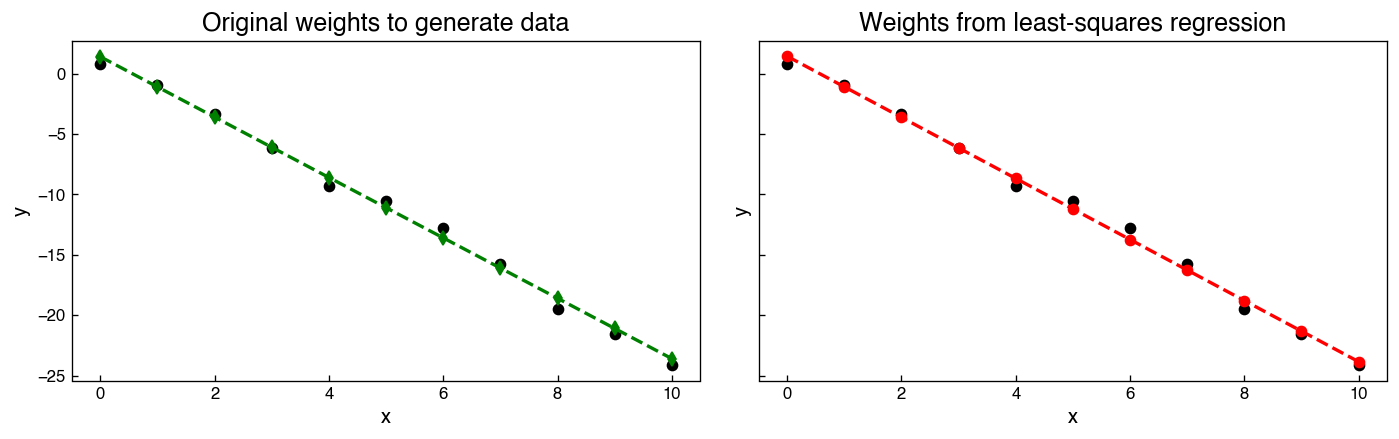

In [34]:
# Lets visually check the results: 

fig, axes = plt.subplots(1, 2, figsize = (12, 4), sharex=True, sharey=True, dpi=120)

axes[0].plot(x, y, 'ok')
axes[0].plot(x, X@w,color='green',marker='d',linestyle = '--')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Original weights to generate data')

axes[1].plot(x, y, 'ok')
axes[1].plot(x, yhat,color='red',marker='o',linestyle = '--')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Weights from least-squares regression')

Now let's work on the dataset that you've seen before from first note. We are using fewer data points with spacing them. See the code below for more detail:

In [35]:
import pandas as pd

df = pd.read_csv("CC16.csv")

print(df.shape) #This csv file has 6569 rows and 6 columns

df.head(10)  #it prints the first 10 rows of the csv file!

(6569, 6)


,Date Time,Decimal Time [mins],Time(mins),Temperature Setpoint [°C],Temperature Actual [°C],Reactor3 Transmission [%]
0,8/19/22 14:12,0:02:47,2.78,20.0,20.0,100
1,8/19/22 14:12,0:02:48,2.80,20.0,20.0,100
2,8/19/22 14:12,0:02:52,2.87,20.0,20.0,86
3,8/19/22 14:12,0:02:53,2.88,20.0,20.0,86
4,8/19/22 14:12,0:02:54,2.90,20.0,20.0,87
5,8/19/22 14:12,0:02:55,2.92,20.0,20.0,87
6,8/19/22 14:12,0:02:56,2.93,20.0,20.0,88
7,8/19/22 14:12,0:02:57,2.95,20.0,20.0,87
8,8/19/22 14:12,0:02:58,2.97,20.0,20.0,89
9,8/19/22 14:12,0:02:59,2.98,20.0,20.0,87


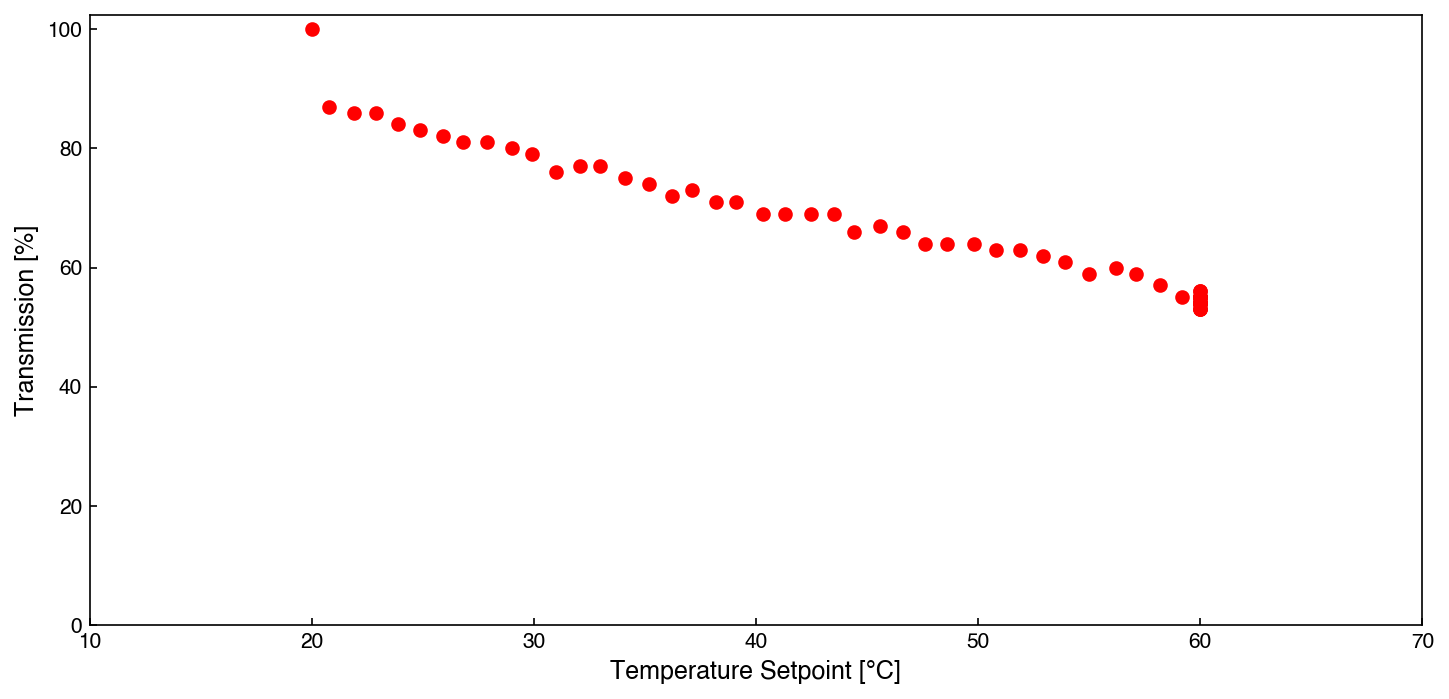

In [36]:
x_all = df['Temperature Setpoint [°C]'].values
y_all = df['Reactor3 Transmission [%]'].values

spacing = 100    
x_all = x_all[::spacing] # we ploted every 100 data points by using the spacing!
y_all = y_all[::spacing]

fig, ax = plt.subplots(figsize=(10, 5)) #create a new figure object (fig) with an associated axis object (ax)
plt.scatter(x_all,y_all,color='red',marker='o')
ax.set_xticks([10,20,30,40,50,60,70])
ax.set_yticks([0,20,40,60,80,100])
ax.set_xlabel('Temperature Setpoint [°C]')
ax.set_ylabel('Transmission [%]');

In [37]:
x_all= x_all.reshape(-1)

There are always multiple ways to do things in Python.

Now we can use the `gaussian_features` function similarly to the `vandermonde` function to create a matrix $\bar{\bar{X}}$ for our general linear model:

In [38]:
def gaussian_features(x, N , sigma = 25):
    # x is a vector
    # sigma is the standard deviation
    x = x.reshape(-1) #ensure that x is a vector
    xk_vec = np.linspace(min(x), max(x), N)
    features = []
    for xk in xk_vec:
        features.append(np.exp(-((x - xk)**2/(2*sigma**2))))
    return np.array(features).T

Sum of Squared Errors: 90.01509026380526


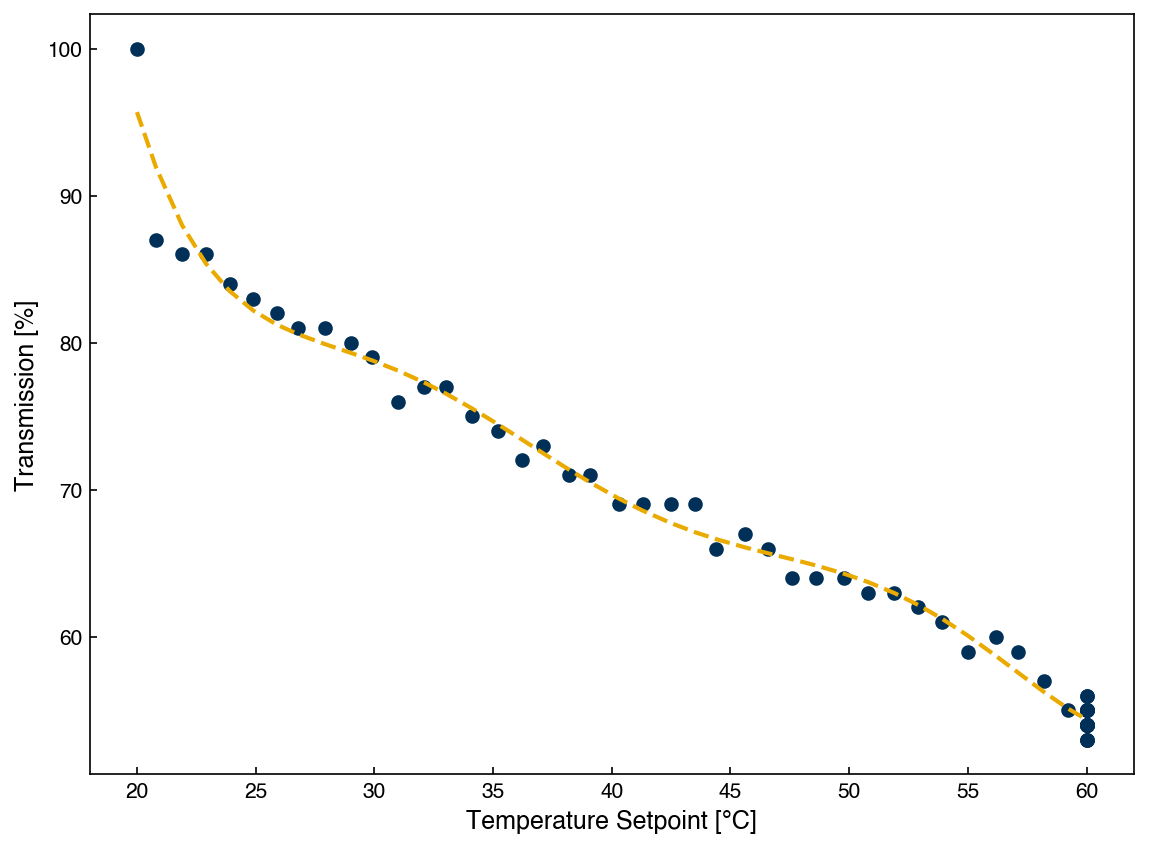

In [39]:
m = 50

X_gauss = gaussian_features(x_all, m) #generate Vandermonde matrix using the Gaussian function!
b_m = np.dot(X_gauss.T, y_all) #generate b vector with new features
A_m = np.dot(X_gauss.T, X_gauss) #generate A matrix with new features
w_m = np.linalg.solve(A_m, b_m) #solve Ax=b with new features
#print('Weights: {}'.format(w_m))

yhat_m = np.dot(X_gauss, w_m) #compute predictions
SSE_m = np.sum((y_all - yhat_m)**2) #compute sum of sum of the squared errors
print('Sum of Squared Errors: {}'.format(SSE_m))

fig, ax = plt.subplots()
ax.plot(x_all, y_all, 'o')
ax.plot(x_all, yhat_m, '--')
ax.set_xlabel('Temperature Setpoint [°C]')
ax.set_ylabel('Transmission [%]');

## scikit-learn model:
So far, we learned about basic of the linear regression but there are different models and functions in Python to make our life easier. 
Here, we will share some basic on scikit-learn library.

- This library is widely used in Python community
- We can easily do general linear regression with this library

First, we need to import the library:


In [40]:
import sklearn
assert sklearn.__version__, "scikit-learn not imported"

After importing the sklearn library, we need to import the LinearRegression so we can use. Here, we are generating features using the Gaussian_features function that we saw earlier. and the results of the SSE improves and r2 is close to 1. You can check the results of the fit if you change the hyperparameter m.

Sum of Squared Errors: 40.76773770786049
0.9953251581253887


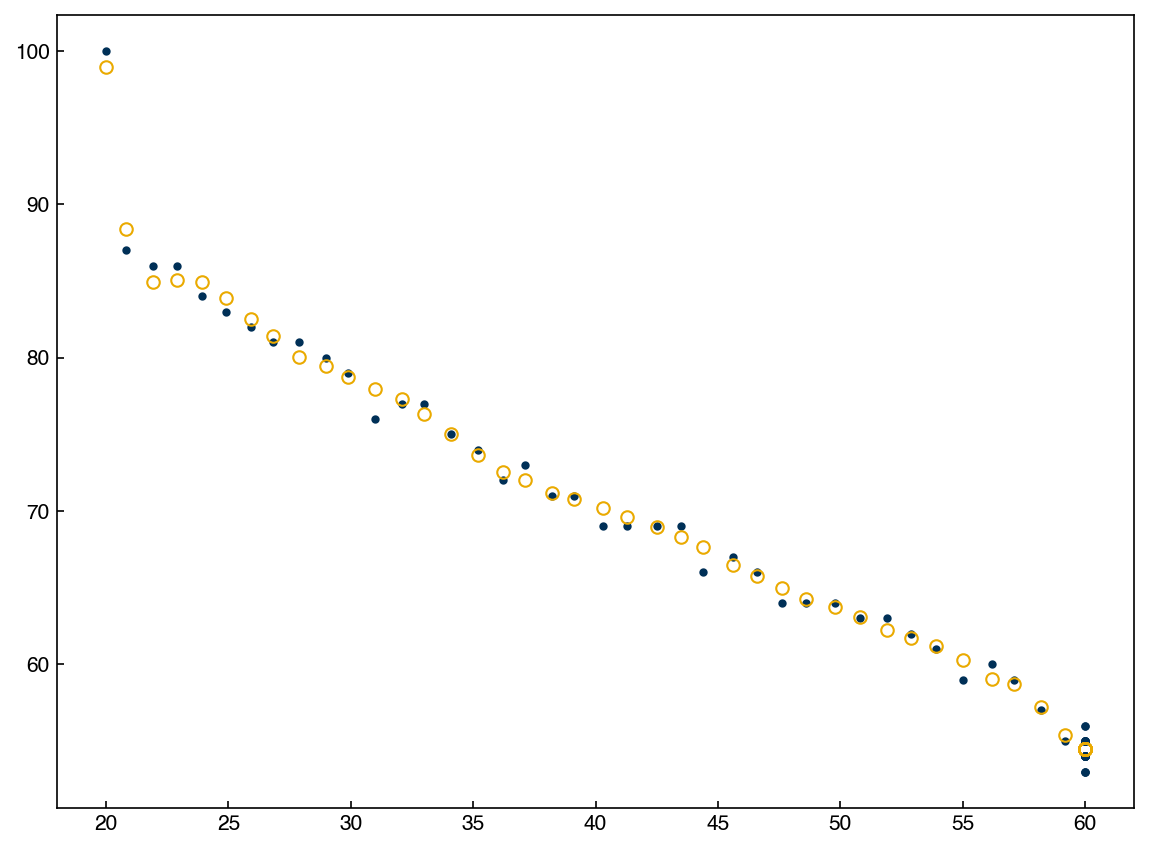

In [41]:
from sklearn.linear_model import LinearRegression

m = 50 

X_m = gaussian_features(x_all,m,sigma=25) #generate features

model = LinearRegression() #create a linear regression model instance

model.fit(X_m, y_all) #fit the model (equivalent to the linear solve)

yhat = model.predict(X_m) #create the model prediction (equivalent to the matrix multiplication)

SSE_LR = np.sum((y_all - yhat)**2) #compute sum of squared errors
r2 = model.score(X_m, y_all)
print('Sum of Squared Errors: {}'.format(SSE_LR))
print(r2)

fig, ax = plt.subplots()
ax.plot(x_all, y_all, '.')
ax.plot(x_all, yhat, 'o', markerfacecolor='none');

### Parametric vs. Non-Parametric Models

A "parametric" model has parameters that do not explicitly depend on or include the input points. The polynomial regression model is an example of a parametric model. The number of parameters is fixed with respect to the number of data points.

A "non-parametric" model includes parameters that are defined on the domain of the independent variables and depend on the inputs. 

Nonparametric models are generally excellent for interpolation, but fail miserably for extrapolation, while parametric models are less accurate for interpolation but provide more reasonable extrapolations. Nonparametric models tend to have many more parameters, and proper optimization of model complexity can lead to similar performance for both types.

See [this post](https://machinelearningmastery.com/parametric-and-nonparametric-machine-learning-algorithms/) for more information.

here is an example of non-parametric model, and you can see how it works on the same dataset. We will see more example in the next class:

r^2 training = 0.9987163512616486
r^2 testing = 0.9861761300193105


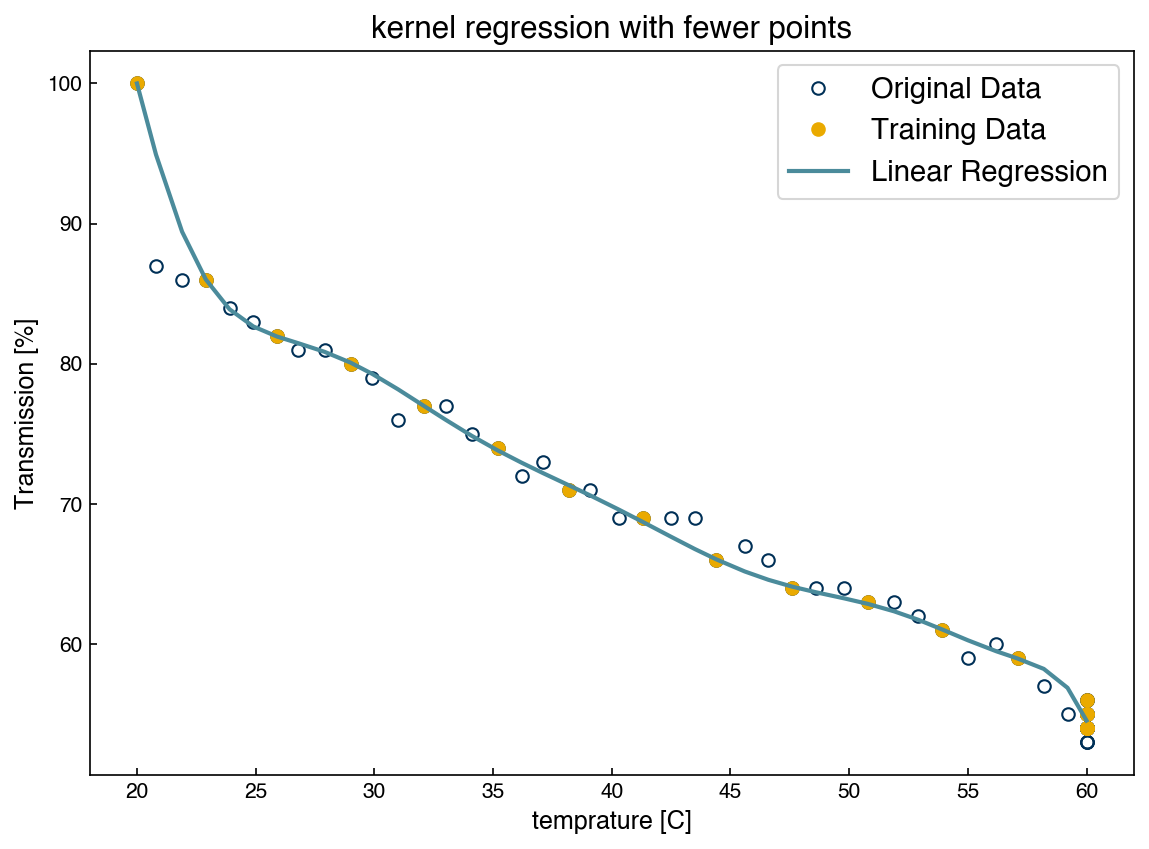

In [55]:

def rbf(x_train, x_test=None, gamma=1):
    if x_test is None:
        x_test = x_train
    N = len(x_test) #<- number of data points
    M = len(x_train) #<- number of features
    X = np.zeros((N,M))
    for i in range(N):
        for j in range(M):
            X[i,j] = np.exp(-gamma*(x_test[i] - x_train[j])**2)
    return X


spacing = 3
sigma = 25
gamma = 1./(2*sigma**2)

x_train = x_all[::spacing]
y_train = y_all[::spacing]

X_train = rbf(x_train, gamma=gamma)

model_rbf = LinearRegression() #create a linear regression model instance
model_rbf.fit(X_train, y_train) #fit the model

r2 = model_rbf.score(X_train, y_train) #get the "score", which is equivalent to r^2
print('r^2 training = {}'.format(r2))

X_all = rbf(x_train, x_test=x_all, gamma=gamma)

yhat_rbf = model_rbf.predict(X_all) #create the model prediction

r2 = model_rbf.score(X_all, y_all) #get the "score", which is equivalent to r^2
print('r^2 testing = {}'.format(r2))

fig, ax = plt.subplots()
ax.plot(x_all, y_all, 'o', markerfacecolor='none')
ax.plot(x_train, y_train, 'o')
ax.plot(x_all, yhat_rbf, '-')
ax.set_xlabel('temprature [C]')
ax.set_ylabel('Transmission [%]')
ax.set_title('kernel regression with fewer points')
ax.legend(['Original Data', 'Training Data', 'Linear Regression'], fontsize=(14))
plt.show()

# Model Validation

So far we have assessed their quality using visualization, sum of squared errors, and  𝑟2.
However, we haven't really discussed what these metrics mean, or discussed alternatives. Before analyzing our real data, we will first look at a well-known toy dataset called Anscomb's quartet:

In [43]:
import numpy as np

x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

In [44]:
def calc_stats(x,y):    
    y_bar = np.mean(y)
    y_std = np.std(x)
    m, b = np.polyfit(x,y,deg=1)
    SST = sum((y - y_bar)**2)
    SSE = sum((y - (m*x+b))**2)
    R2 = (SST - SSE)/SST
    return y_bar, y_std, m, b, R2

stats1 = calc_stats(x,y1)
print("Dataset 1: mean={:.2f}, stdev={:.2f}, m={:.2f}, b={:.2f}, R2={:.2f}".format(*stats1))
stats2 = calc_stats(x,y2)
print("Dataset 2: mean={:.2f}, stdev={:.2f}, m={:.2f}, b={:.2f}, R2={:.2f}".format(*stats2))
stats3 = calc_stats(x,y3)
print("Dataset 3: mean={:.2f}, stdev={:.2f}, m={:.2f}, b={:.2f}, R2={:.2f}".format(*stats3))
stats4 = calc_stats(x4,y4)
print("Dataset 4: mean={:.2f}, stdev={:.2f}, m={:.2f}, b={:.2f}, R2={:.2f}".format(*stats4))
avg, std, m, b, r2 = stats1

Dataset 1: mean=7.50, stdev=3.16, m=0.50, b=3.00, R2=0.67
Dataset 2: mean=7.50, stdev=3.16, m=0.50, b=3.00, R2=0.67
Dataset 3: mean=7.50, stdev=3.16, m=0.50, b=3.00, R2=0.67
Dataset 4: mean=7.50, stdev=3.16, m=0.50, b=3.00, R2=0.67


Although these dataset have the same statistics, they are not actually the same. Lets plot them:

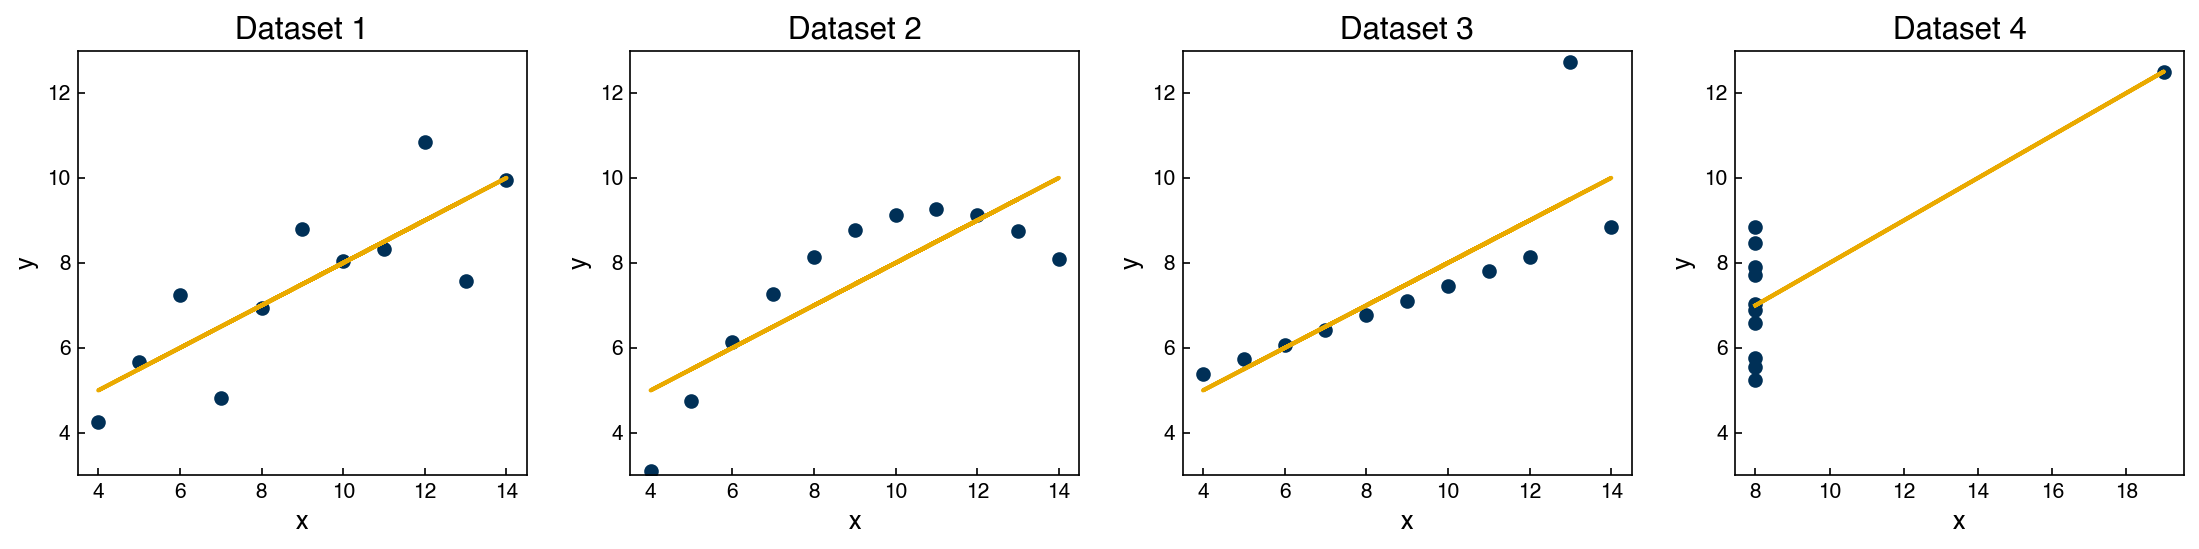

In [45]:
fig, axes = plt.subplots(1,4,figsize=(15,4))
yhat = m*x + b
axes[0].plot(x, y1, 'o')
axes[0].plot(x, yhat, ls = '-')

axes[1].plot(x, y2, 'o')
axes[1].plot(x, yhat, ls = '-')

axes[2].plot(x, y3, 'o')
axes[2].plot(x, yhat, ls = '-')

axes[3].plot(x4, y4, 'o')
axes[3].plot(x4, m * x4 + b, ls = '-')

for i, ax in enumerate(axes):
    if not i == 3:
        ax.set_xticks([4, 6, 8, 10, 12, 14])
    else:
        ax.set_xticks([8, 10, 12, 14, 16, 18])
    ax.set_ylim([3, 13])    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Dataset {}'.format(str(i + 1)))

plt.show()

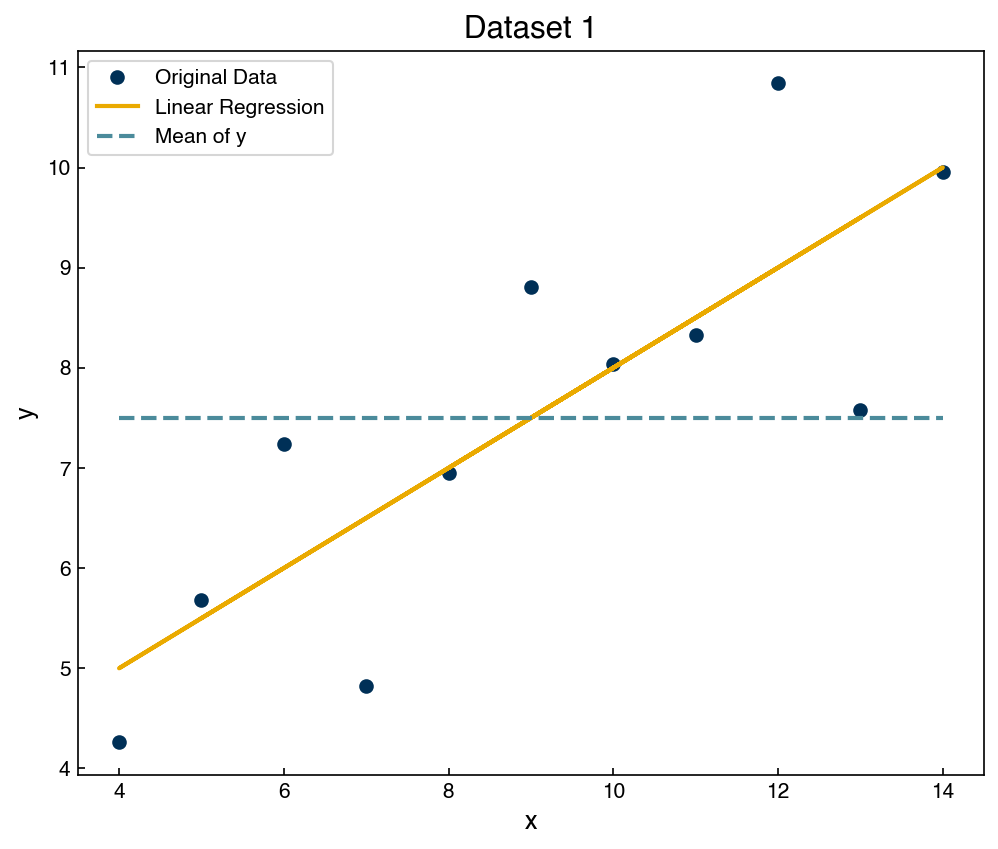

In [46]:
fig, ax = plt.subplots(figsize = (7, 6))
yhat = m * x + b
ax.plot(x, y1, 'o')
ax.plot(x, yhat, ls = '-')
ax.plot([min(x), max(x)], [np.mean(y1), np.mean(y1)], '--')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Dataset 1')
ax.legend(['Original Data', 'Linear Regression', 'Mean of y'],fontsize=10)
plt.show()

* #### Mean absolute error (MAE)

$MAE = \frac{1}{N} \sum_{i=0}^N |y_i - \hat{y}_i|$

* #### Root-mean-sqaured error (RMSE)

$RMSE = \sqrt{\frac{1}{N} \sum_{i=0}^N (y_i - \hat{y}_i)^2}$

MAE and RMSE are very similar. Both have units of the dependent variable ($y$), and can vary from 0 to $\infty$ with lower values being better. MAE is less affected by outliers and sample size, but it is always lower than RMSE, so it is a less conservative estimate. MAE and RMSE are related by the inequalities:

$MAE \leq RMSE \leq MAE \times \sqrt{N}$

* #### Maximum error

Sometimes it is useful to assess the maximum error of a model, $max(\epsilon_i)$. This is useful to assess a worst-case scenario, and provides a conservative estimate of model performance.

* #### Parity plots

Plotting $y$ vs. $\hat{y}$ provides a visual analysis of the error. This can be particularly useful if your model is highly non-linear or has more than one input variable:

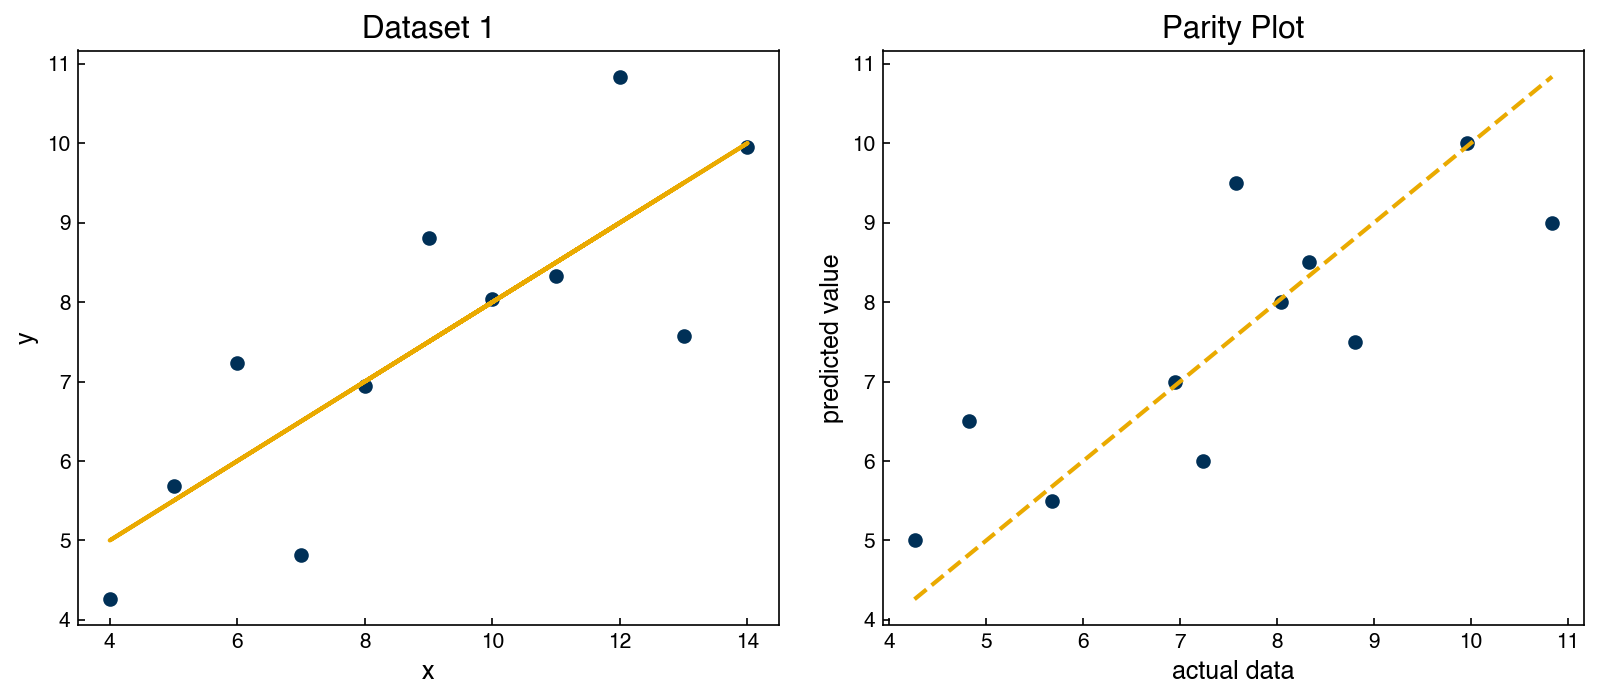

In [47]:
fig, axes = plt.subplots(1,2, figsize = (11, 5))
yhat = m*x + b

axes[0].plot(x, y1, 'o')
axes[0].plot(x, yhat, ls='-')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Dataset 1')

axes[1].plot(y1, yhat, 'o')
axes[1].plot([min(y1), max(y1)], [min(y1), max(y1)], ls='--')
axes[1].set_xlabel('actual data')
axes[1].set_ylabel('predicted value')
axes[1].set_title('Parity Plot')

plt.show()

## Exercise:
You can create a histogram of the error between the model and the actual data. This can provide insight into whether the error is normally distributed or not. You can use the first note file from plotting folder for histogram plot.

## Resources: 

- Linear Regression from Data Analytics for Chemical Engineers- Prof. Medford,GT
- Probability and Statistics for Engineers and Scientists- Anthony J. Hayter
